In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


dataAribnb = pd.read_csv('AB_NYC_2019.csv')

## 1. Exploratory Data Analysis (EDA)

In [28]:
dataAribnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [29]:
dataAribnb.info()
dataAribnb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [30]:
# Drop rows with missing 'name' and 'host_name'
dataAribnb.dropna(subset=['name', 'host_name'], inplace=True)

# Impute missing values in 'last_review' and 'reviews_per_month' with median or forward-fill
dataAribnb['last_review'].fillna(method='ffill', inplace=True)
dataAribnb['reviews_per_month'].fillna(dataAribnb['reviews_per_month'].median(), inplace=True)
dataAribnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.239035,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.520889,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


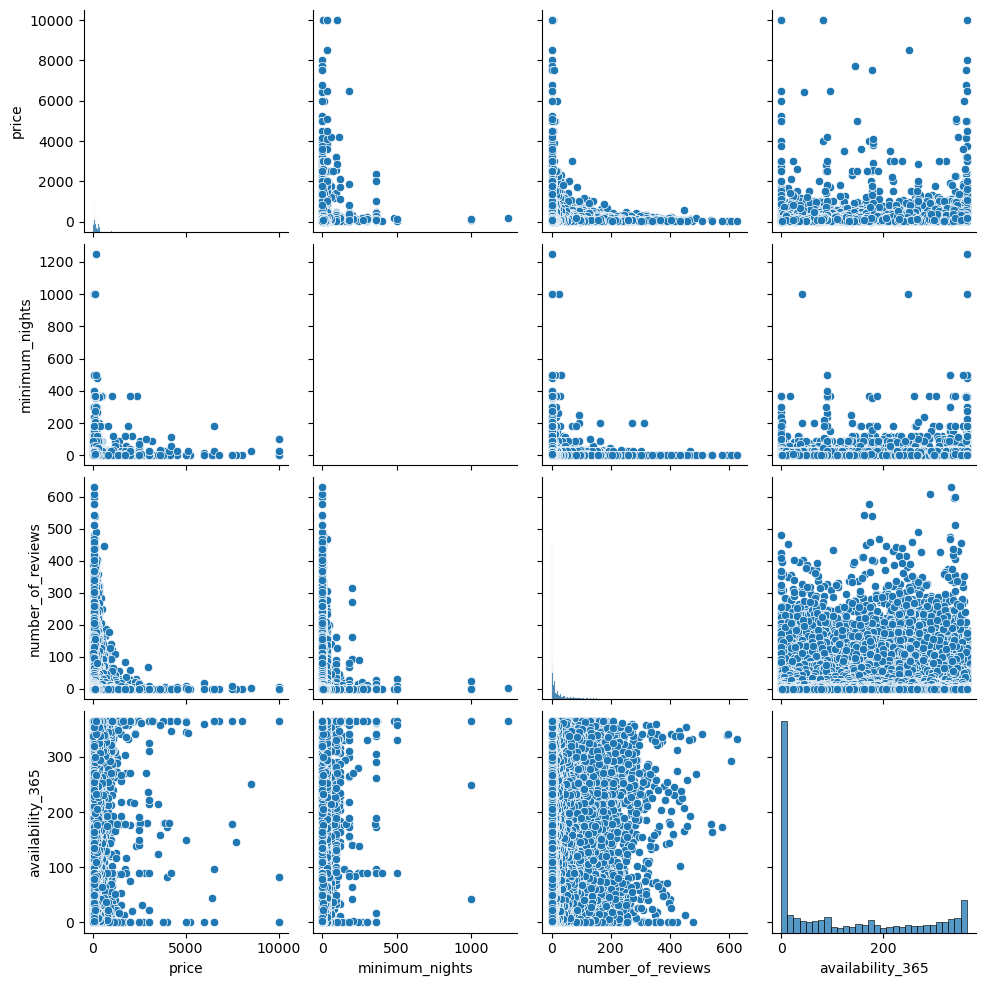

In [33]:
import seaborn as sns

# Create a pairplot
sns.pairplot(dataAribnb[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']])
plt.show()

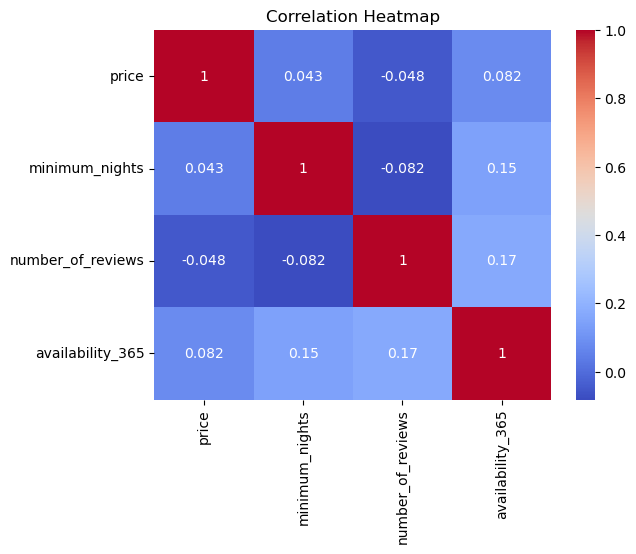

In [34]:
# Calculate correlation matrix
correlation_matrix = dataAribnb[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Task 1: For Each Comparison there should be a clear reason why we are comparing (OBJECTIVE)
- Identify Patterns between Borough/Neighborhood to Price and to Rating - Create a visual
- Create a visual for the relationship between (availability and price) and (availability and # of rating) for neighborhoods


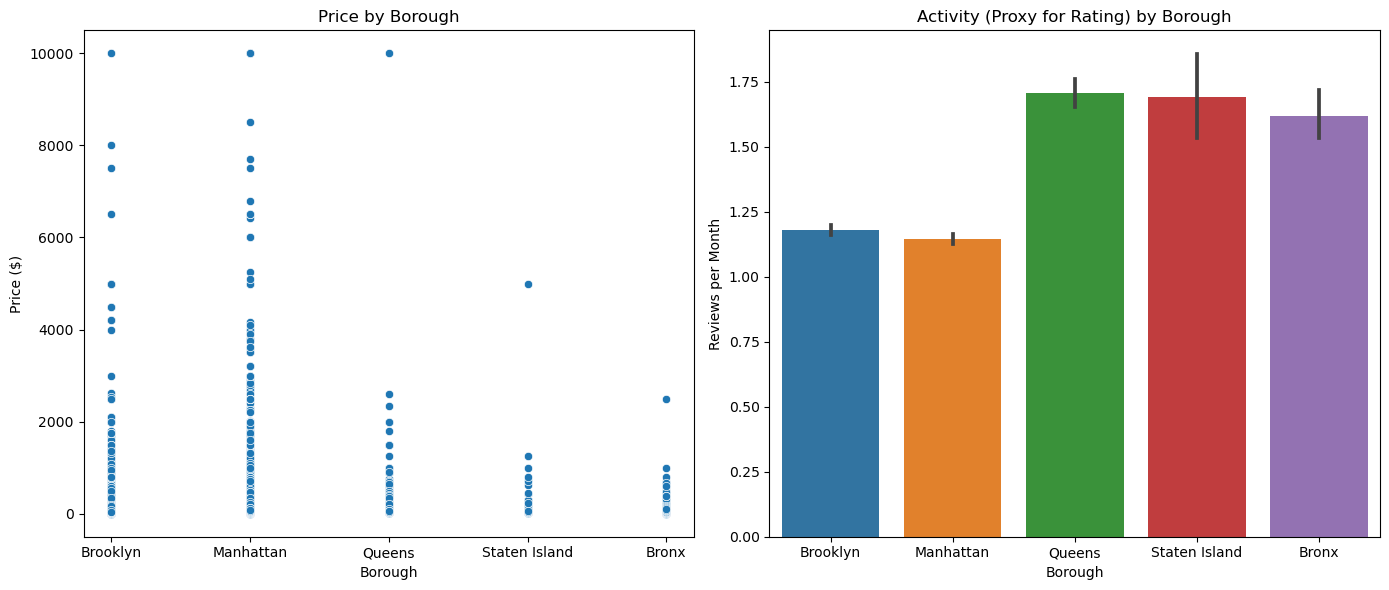

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Price vs Borough/Neighborhood Group
sns.scatterplot(data=dataAribnb, x='neighbourhood_group', y='price', ax=ax[0])
ax[0].set_title('Price by Borough')
ax[0].set_ylabel('Price ($)')
ax[0].set_xlabel('Borough')

# Reviews per Month vs Borough/Neighborhood Group
sns.abarplot(data=dataAribnb, x='neighbourhood_group', y='reviews_per_month', ax=ax[1])
ax[1].set_title('Activity (Proxy for Rating) by Borough')
ax[1].set_ylabel('Reviews per Month')
ax[1].set_xlabel('Borough')

plt.tight_layout()
plt.show()

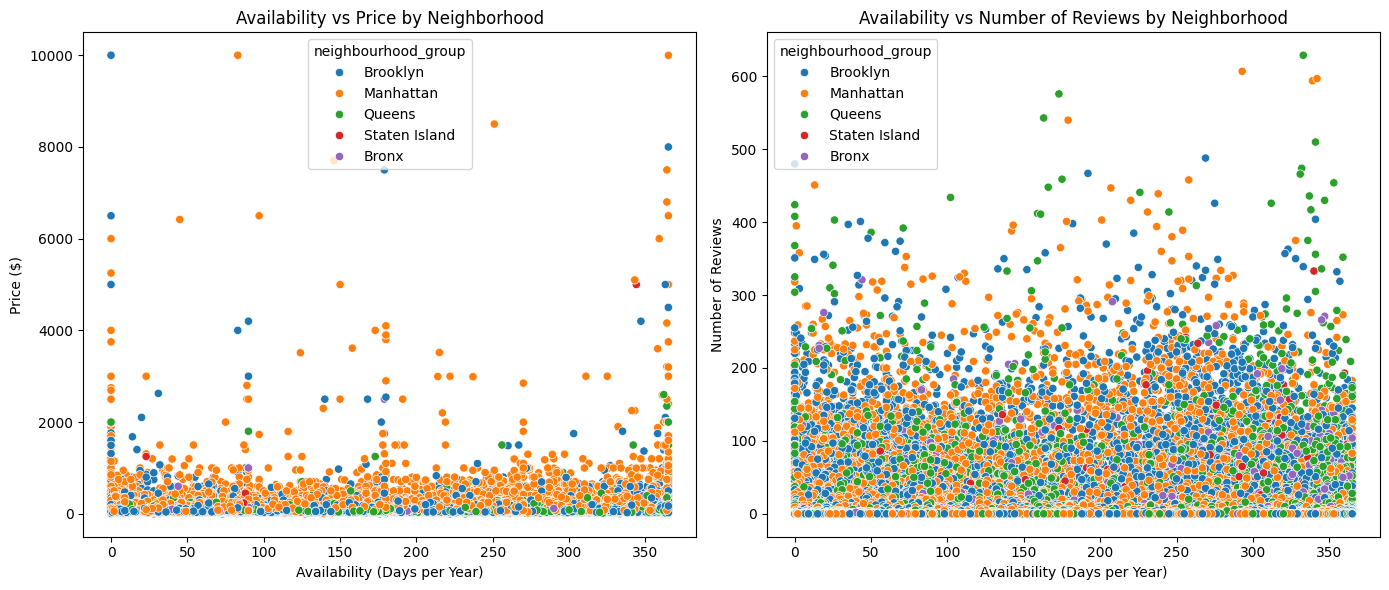

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualization for Availability vs Price
sns.scatterplot(ax=axes[0], data=dataAribnb, x='availability_365', y='price', hue='neighbourhood_group')
axes[0].set_title('Availability vs Price by Neighborhood')
axes[0].set_xlabel('Availability (Days per Year)')
axes[0].set_ylabel('Price ($)')

# Visualization for Availability vs Number of Reviews
sns.scatterplot(ax=axes[1], data=dataAribnb, x='availability_365', y='number_of_reviews', hue='neighbourhood_group')
axes[1].set_title('Availability vs Number of Reviews by Neighborhood')
axes[1].set_xlabel('Availability (Days per Year)')
axes[1].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

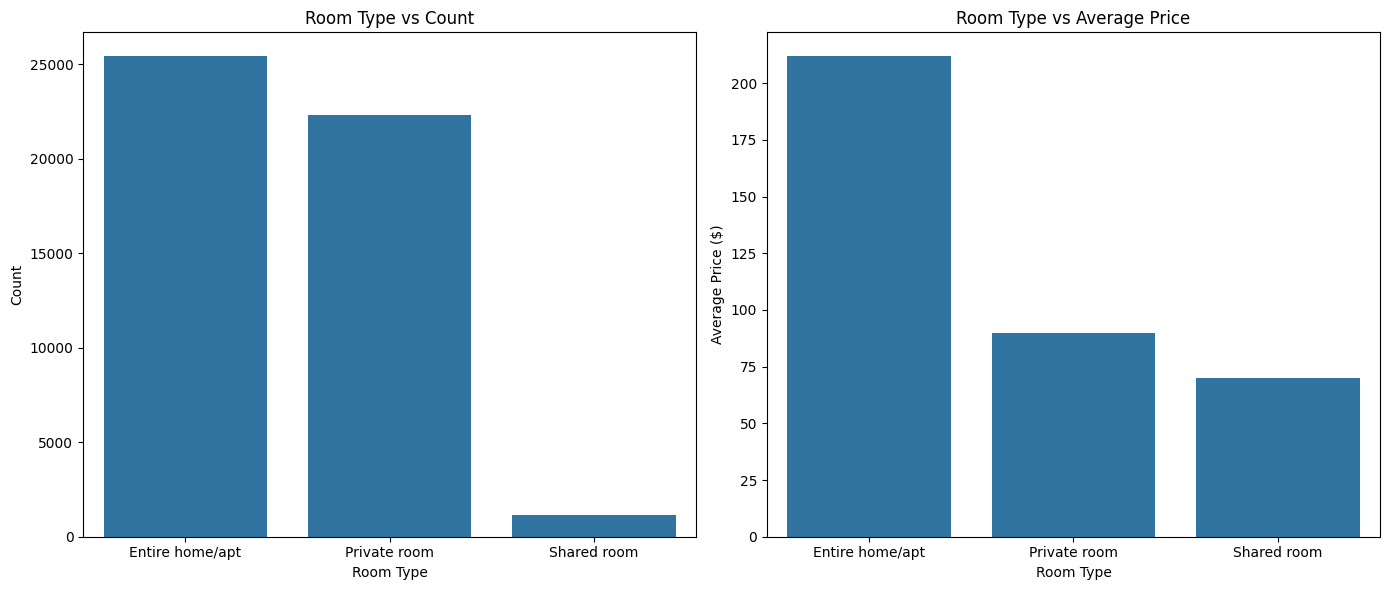

In [5]:
room_type_count = dataAribnb['room_type'].value_counts().reset_index()
room_type_count.columns = ['room_type', 'count'] 

# Avg Price
room_type_price = dataAribnb.groupby('room_type')['price'].mean().reset_index()

# matplotlib figure (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Room Type vs Count
sns.barplot(ax=axes[0], data=room_type_count, x='room_type', y='count')
axes[0].set_title('Room Type vs Count')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Count')

# Room Type vs Average Price
sns.barplot(ax=axes[1], data=room_type_price, x='room_type', y='price')
axes[1].set_title('Room Type vs Average Price')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Average Price ($)')

plt.tight_layout()
plt.show()

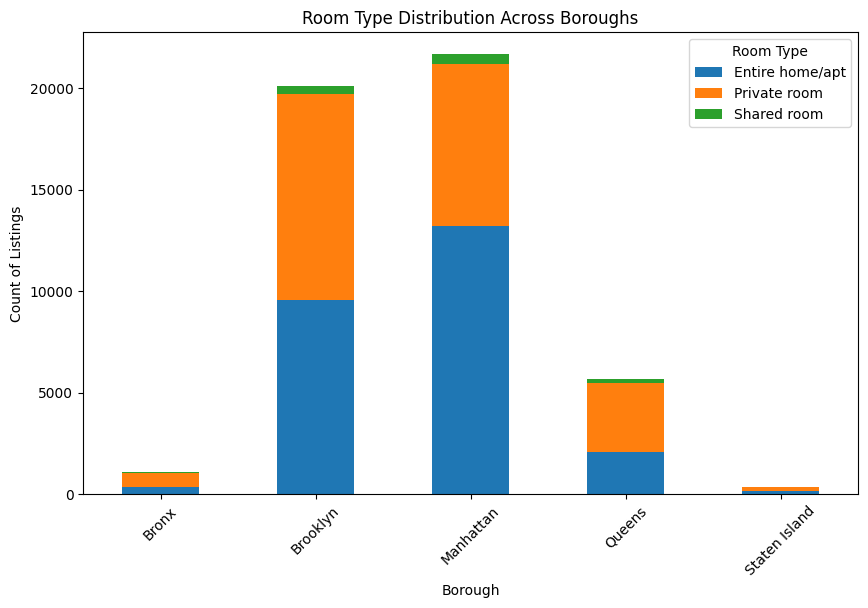

In [6]:
room_type_borough_count = dataAribnb.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0)

# stacked bar chart
room_type_borough_count.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Room Type Distribution Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)  # Rotate x-axis label for better readability
plt.legend(title='Room Type')

plt.show()

In [60]:


 

print("Minimum Longitude:", dataAribnb['longitude'].min())
print("Maximum Longitude:", dataAribnb['longitude'].max())
print("Minimum Latitude:", dataAribnb['latitude'].min())
print("Maximum Latitude:", dataAribnb['latitude'].max())

filtered_data = dataAribnb[dataAribnb['number_of_reviews'] > 50]
total_elements = filtered_data.shape[0]  # This gives you the number of rows
print("Total number of elements in filtered data:", total_elements)


Minimum Longitude: -74.24442
Maximum Longitude: -73.71299
Minimum Latitude: 40.49979
Maximum Latitude: 40.91306
Total number of elements in filtered data: 6959


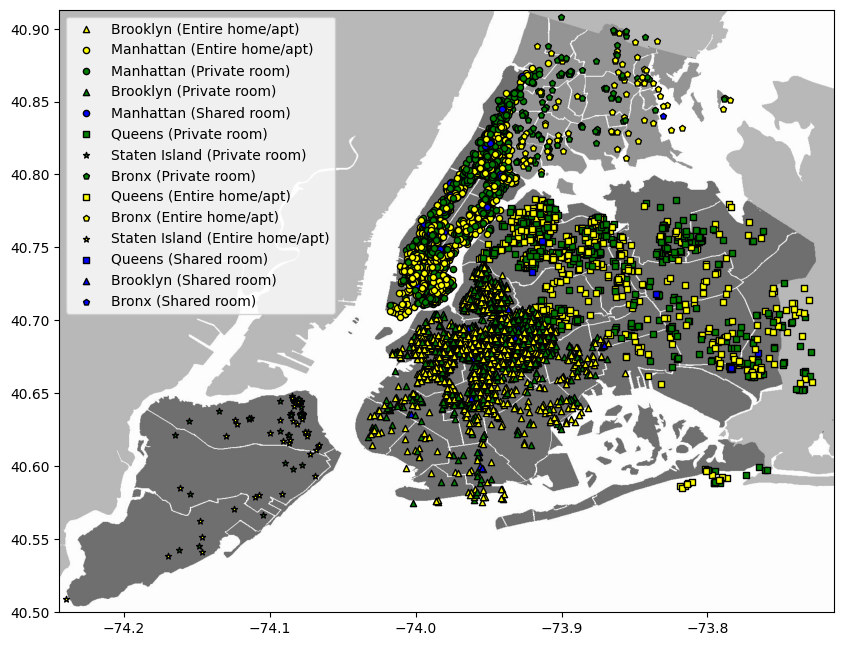

In [61]:
# This gives you all the locations with 50 reviews or more in new york city

# Read the image file
img = plt.imread('/Users/ardadinc/Desktop/Airbnb Project/New_York_City_.jpg')


plt.figure(figsize=(10, 10))


# Alter according to min and max in the code above
map_bounds = {
    'left': -74.24442, 
    'right': -73.71299, 
    'bottom': 40.49979, 
    'top': 40.91306
}

room_type_colors = {
    'Entire home/apt': 'yellow', 
    'Private room': 'green', 
    'Shared room': 'blue'
}

neighbourhood_shapes = {
    'Manhattan': 'o',  # circle
    'Brooklyn': '^',  # triangle
    'Queens': 's',  # square
    'Bronx': 'p',  # pentagon
    'Staten Island': '*'  # star
}


# Scatter plot for each data point
for i, point in filtered_data.iterrows():
    plt.scatter(
        x=point['longitude'], 
        y=point['latitude'], 
        c=room_type_colors[point['room_type']],  # color based on room type
        marker=neighbourhood_shapes[point['neighbourhood_group']],  # the shapes for the neighbourhood group
        s=20,  # Change size of the shapes
        label=f"{point['neighbourhood_group']} ({point['room_type']})", 
        edgecolor='black'
    )

plt.imshow(img, extent=[map_bounds['left'], map_bounds['right'], map_bounds['bottom'], map_bounds['top']])

# set bounds of map 
plt.xlim(map_bounds['left'], map_bounds['right'])
plt.ylim(map_bounds['bottom'], map_bounds['top'])

# create a legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

Task 2: For Each Comparison there should be a clear reason why we are compariing (OBJECTIVE)
- Create a Dataframe for Host related values ie.(calculated_host_listings_count, number_of_reviews, neighboord/borough)
- Examine geographical availability and create a visual for availability vs availability_365/price
- Examine rental metrics price/location/price
